In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# MovieLens1M and Jester
jester = {'LLI': {'MAE': [0.780155748128891, 0.0008293048678722447], 'RMSE': [2.5694790124893188, 0.002357667615713407]},\
        'SlopeOne': {'MAE': [3.24346061, 0.00582920], 'RMSE': [4.276264, 0.00594627]},\
        'SVD': {'MAE': [3.33184702, 0.003690941], 'RMSE': [4.42742606, 0.003001447]},\
        'NMF': {'MAE':[3.355650612340057,0.010752853351171082], 'RMSE': [4.374144414, 0.00924872]},\
        'KNNBasic':{'MAE':[3.186790462, 0.0031942866], 'RMSE': [4.374144414, 0.00924872]},\
        'KNNWithMeans':{'MAE':[3.13529441760, 0.005351285412], 'RMSE': [4.185004, 0.0059447]},\
        'KNNWithZScore':{'MAE':[3.1310810,0.0013469225], 'RMSE': [4.1935003600868, 0.0053512854128740985]},\
        'KNNBaseline':{'MAE':[3.118214675392, 0.00062561594], 'RMSE': [4.160602907402,0.00353159385]},\
        'NormalPredictor': {'MAE':[5.880311067, 0.0077080144], 'RMSE' : [7.26971411,0.0080865294]},\
}

#'LLI': {'MAE': [3.66033864, 2.9802322387695312e-05], 'RMSE': [4.644750118255, 0.003978729248]}

ml_1m = {'LLI': {'MAE': [0.02736947014927864, 4.8901083778024345e-05], 'RMSE': [0.3036342322826385, 0.0005537608722051506]},\
        'SlopeOne': {'MAE': [0.7162062286177, 0.00046123449286989023], 'RMSE': [0.9082294888547588, 0.0004939931702374945]},\
        'SVD': {'MAE': [0.6961877998544651, 0.0009211154026132371], 'RMSE': [0.8856978353606525, 0.001187294716554586]},\
        'NMF': {'MAE':[0.8121980198380494, 0.06803363663186758], 'RMSE' : [1.054514096199889, 0.10570039677609855]},\
        'KNNBasic':{'MAE':[0.7897773236286172, 0.0006578187489354635], 'RMSE': [1.0092654191863446, 0.0006977068883130683]},\
        'KNNWithMeans':{'MAE':[0.7104406717158778, 0.0005473837100530133], 'RMSE': [0.9043761667961429, 0.0011609268080959505]},\
        'KNNWithZScore':{'MAE':[0.7100513341196754, 0.0012320620910324896], 'RMSE': [0.9057406195724796, 0.0015431355450819461]},\
        'KNNBaseline':{'MAE':[0.7123275216510949, 0.0005397593326109994], 'RMSE': [0.9056859793736022, 0.000606549912372103]},\
        'NormalPredictor': {'MAE':[1.2067523182328526, 7.888168996591403e-05], 'RMSE': [1.505686395630935, 0.00021683470333301992]},\
}

# 'LLI': {'MAE': [0.7440393269062042, 0.0009473264217376709], 'RMSE': [0.9340194165706635, 0.00020560622215270996]}

In [8]:
def get_MAE_RMSE(data):
    MAE_mean = {}
    MAE_std = {}
    RMSE_mean = {}
    RMSE_std = {}
    for key, value in data.items():
        MAE_mean[key] = round(value['MAE'][0], 5)
        MAE_std[key] = round(value['MAE'][1], 5)
        RMSE_mean[key] = round(value['RMSE'][0], 5)
        RMSE_std[key] = round(value['RMSE'][1], 5) 
    MAE = [MAE_mean, MAE_std]
    RMSE = [RMSE_mean, RMSE_std]
    return MAE, RMSE

In [9]:
MAE_jester, RMSE_jester = get_MAE_RMSE(jester) 
MAE_ml_1m, RMSE_ml_1m = get_MAE_RMSE(ml_1m) 
labels = list(jester.keys())
length = len(labels)

In [6]:
def draw(data_1, data_2, labels, length, metric):
    X = np.arange(length)
    Y1 = list(data_1[0].values())
    Y2 = list(data_2[0].values())
    std1 = list(data_1[1].values())
    std2 = list(data_2[1].values())
    Y1_plus = [a + b for a, b in zip(Y1, std1)]
    Y1_minus = [a - b for a, b in zip(Y1, std1)]
    Y2_plus = [a + b for a, b in zip(Y2, std2)]
    Y2_minus = [a - b for a, b in zip(Y2, std2)]
    
    fig = plt.figure(figsize=(9, 8), dpi=80)
    
    # mean and std
    plt.errorbar(X - 0.2, Y1, yerr = std1,fmt='.k',ecolor = 'blue',color='blue')
    plt.errorbar(X + 0.2, Y2, yerr = std2,fmt='.k',ecolor = 'blue',color='blue')
    plt.bar(X - .2, Y1,width=0.4, label = 'Jester-2', linestyle = 'None',)
    plt.bar(X + .2, Y2,width=0.4, label = 'MovieLens-1M', linestyle = 'None',)
    plt.xticks(X, labels, rotation=45, ha="right", fontsize = 20)
    plt.legend(loc='upper left', shadow=True, fontsize=20)
    plt.ylabel(metric, fontsize=30)
    plt.yticks(fontsize = 20)
    # plt.savefig(fname = f"{metric}_plot_2_dim_new", bbox_inches='tight')
    plt.show()
    return X, Y1, Y2

/var/folders/49/pg5yxbs953d7nt095vtk4dzm0000gn/T/ipykernel_71891/595166794.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(X - 0.2, Y1, yerr = std1,fmt='.k',ecolor = 'blue',color='blue')
/var/folders/49/pg5yxbs953d7nt095vtk4dzm0000gn/T/ipykernel_71891/595166794.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(X + 0.2, Y2, yerr = std2,fmt='.k',ecolor = 'blue',color='blue')


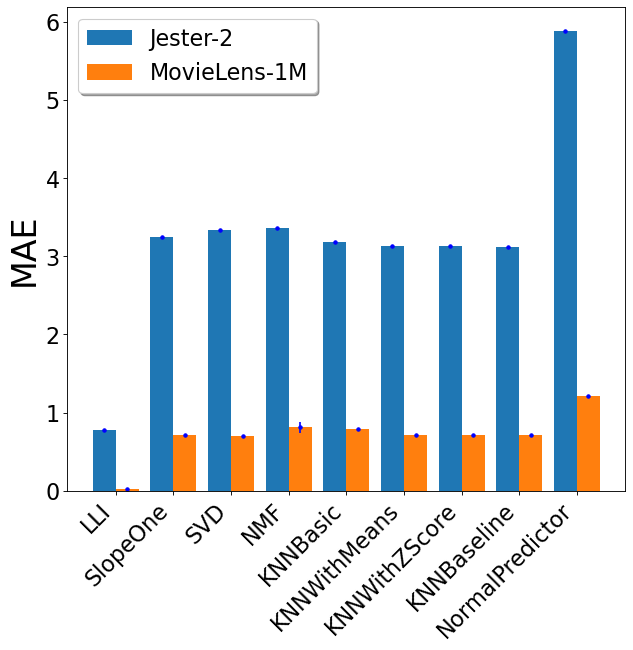

/var/folders/49/pg5yxbs953d7nt095vtk4dzm0000gn/T/ipykernel_71891/595166794.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(X - 0.2, Y1, yerr = std1,fmt='.k',ecolor = 'blue',color='blue')
/var/folders/49/pg5yxbs953d7nt095vtk4dzm0000gn/T/ipykernel_71891/595166794.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(X + 0.2, Y2, yerr = std2,fmt='.k',ecolor = 'blue',color='blue')


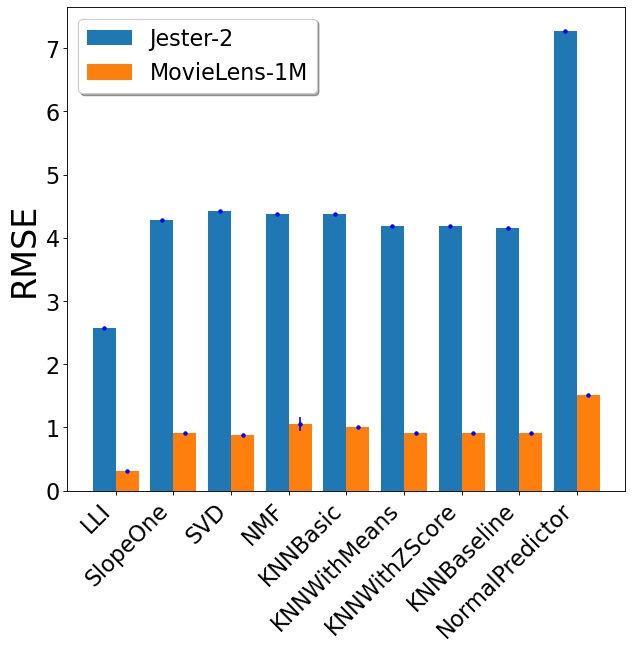

In [577]:
X, jester_MAE, ml_1m_MAE = draw(MAE_jester, MAE_ml_1m, labels, length, "MAE")
X, jester_RMSE, ml_1m_RMSE = draw(RMSE_jester, RMSE_ml_1m, labels, length, "RMSE")

In [28]:
# print([(i, b) for i, b in zip(labels, ml_1m_MAE)])
# print([(i, b) for i, b in zip(labels, jester_MAE)])
print([(i, b) for i, b in MAE_ml_1m[1].items()])
print([(0, b) for i, b in MAE_ml_1m[1].items()])
print([(0, b) for i, b in MAE_jester[1].items()])
print(labels)

[('LLI', 5e-05), ('SlopeOne', 0.00046), ('SVD', 0.00092), ('NMF', 0.06803), ('KNNBasic', 0.00066), ('KNNWithMeans', 0.00055), ('KNNWithZScore', 0.00123), ('KNNBaseline', 0.00054), ('NormalPredictor', 8e-05)]
[(0, 5e-05), (0, 0.00046), (0, 0.00092), (0, 0.06803), (0, 0.00066), (0, 0.00055), (0, 0.00123), (0, 0.00054), (0, 8e-05)]
[(0, 0.00083), (0, 0.00583), (0, 0.00369), (0, 0.01075), (0, 0.00319), (0, 0.00535), (0, 0.00135), (0, 0.00063), (0, 0.00771)]
['LLI', 'SlopeOne', 'SVD', 'NMF', 'KNNBasic', 'KNNWithMeans', 'KNNWithZScore', 'KNNBaseline', 'NormalPredictor']


In [29]:
RMSE_ml_1m[1]

{'LLI': 0.00055,
 'SlopeOne': 0.00049,
 'SVD': 0.00119,
 'NMF': 0.1057,
 'KNNBasic': 0.0007,
 'KNNWithMeans': 0.00116,
 'KNNWithZScore': 0.00154,
 'KNNBaseline': 0.00061,
 'NormalPredictor': 0.00022}

# 1 dim feature

In [30]:
import torch as t

In [31]:
error_age = t.tensor([
[364.0659484863281, 32.13654708862305, 1.3289427757263184, 0.06989811360836029, 0.003955724649131298, 0.0002294250880368054, 1.3415701687335968e-05, 7.866097462283506e-07, 4.616168070015192e-08, 2.709479751672461e-09, 1.5859238922111274e-10, 9.366264708265959e-12],
[364.197998046875, 32.14402389526367, 1.329204797744751, 0.06989962607622147, 0.003955072723329067, 0.00022934708977118134, 1.3408925042313058e-05, 7.861244739615358e-07, 4.6125705921440385e-08, 2.706583845935029e-09, 1.593948584233118e-10, 9.44846891698381e-12],
[364.15673828125, 32.130035400390625, 1.3282177448272705, 0.06981734931468964, 0.003948865458369255, 0.0002289082040078938, 1.3378942639974412e-05, 7.840685611881781e-07, 4.598413738676754e-08, 2.697179368738034e-09, 1.580522657196326e-10, 9.366398281973609e-12],
[364.1803894042969, 32.11491012573242, 1.3287365436553955, 0.0698881670832634, 0.003954720217734575, 0.00022933472064323723, 1.3408496670308523e-05, 7.861163453526387e-07, 4.6118955765450664e-08, 2.7077851072476733e-09, 1.5917681062127542e-10, 9.432692474331539e-12],
[364.1439514160156, 32.1202392578125, 1.3288202285766602, 0.06990255415439606, 0.003956541884690523, 0.00022950454149395227, 1.3422244592220522e-05, 7.871013281146588e-07, 4.6197115466384275e-08, 2.7104625210938593e-09, 1.5875258052577834e-10, 9.399998140979804e-12],
[364.1445617675781, 32.15107345581055, 1.3293147087097168, 0.06989194452762604, 0.003954017534852028, 0.00022925464145373553, 1.3401952855929267e-05, 7.856202159928216e-07, 4.6090729455272594e-08, 2.7032651672698194e-09, 1.581540315376273e-10, 9.374202802892029e-12],
[364.03277587890625, 32.120304107666016, 1.3283412456512451, 0.069854736328125, 0.003952388651669025, 0.0002291772689204663, 1.3398152077570558e-05, 7.854434898035834e-07, 4.6078199034127465e-08, 2.703106627421903e-09, 1.5824698496036405e-10, 9.386614749362643e-12],
[364.0716552734375, 32.12691879272461, 1.328369140625, 0.06986899673938751, 0.003954350482672453, 0.00022936641471460462, 1.341372262686491e-05, 7.866127589295502e-07, 4.6159890132457804e-08, 2.7097302179868166e-09, 1.586787923280042e-10, 9.396073329115406e-12],
[364.1632385253906, 32.124874114990234, 1.3282866477966309, 0.06984461843967438, 0.003951879683881998, 0.00022916359012015164, 1.339850768999895e-05, 7.854755494918209e-07, 4.608578763054538e-08, 2.7038296046555388e-09, 1.5855455837154864e-10, 9.354081745294174e-12],
[364.0938720703125, 32.127967834472656, 1.3279497623443604, 0.06981240957975388, 0.003949061036109924, 0.0002289386175107211, 1.3381803000811487e-05, 7.842684226488927e-07, 4.6012360144231934e-08, 2.698492096442351e-09, 1.5785890650210632e-10, 9.372027459653154e-12]
])
    
error_occup = t.tensor([
[388.16400146484375, 32.42563247680664, 1.3782680034637451, 0.07348233461380005, 0.004181481897830963, 0.00024304649559780955, 1.4225044651539065e-05, 8.34410627703619e-07, 4.897707839290888e-08, 2.8736029111797734e-09, 1.6926118839855064e-10, 1.0208379280784996e-11],
[388.28240966796875, 32.42564392089844, 1.378204345703125, 0.07347563654184341, 0.004180937074124813, 0.00024300557561218739, 1.4222301615518518e-05, 8.342121873283759e-07, 4.895910521440783e-08, 2.872866611269842e-09, 1.6902801380780375e-10, 1.0214889697990337e-11],
[388.2135314941406, 32.42390823364258, 1.3782026767730713, 0.07347714155912399, 0.00418116245418787, 0.0002430278982501477, 1.4224056030798238e-05, 8.343504305230454e-07, 4.89705058726031e-08, 2.8735280821479137e-09, 1.6907540645316743e-10, 1.0203029393585084e-11],
[388.1943664550781, 32.420894622802734, 1.3779312372207642, 0.07345902919769287, 0.004179842304438353, 0.00024293121532537043, 1.4217062926036306e-05, 8.338430461662938e-07, 4.8939302388362194e-08, 2.8720095190948314e-09, 1.6899215360410835e-10, 1.02340497187825e-11],
[388.20806884765625, 32.426307678222656, 1.378391981124878, 0.073494091629982, 0.004182427190244198, 0.00024311579181812704, 1.4230085980670992e-05, 8.347551556653343e-07, 4.8995065782264646e-08, 2.8752826786160313e-09, 1.6926349211132674e-10, 1.0258674118523992e-11],
[388.2187194824219, 32.419212341308594, 1.3780049085617065, 0.07347210496664047, 0.004181187599897385, 0.000243045695242472, 1.4225941413315013e-05, 8.345045898749959e-07, 4.898527805607955e-08, 2.8756765857451683e-09, 1.6908326128106665e-10, 1.02643275823322e-11],
[388.2355041503906, 32.424774169921875, 1.3780802488327026, 0.07347524911165237, 0.004181339871138334, 0.0002430518070468679, 1.4226296116248704e-05, 8.345375590579351e-07, 4.8989114986852655e-08, 2.874865234758772e-09, 1.6902131083629257e-10, 1.0265570511702737e-11],
[388.21820068359375, 32.416961669921875, 1.3777782917022705, 0.07344706356525421, 0.0041788313537836075, 0.0002428505104035139, 1.4210952940629795e-05, 8.33408421385684e-07, 4.891597171763351e-08, 2.870876647520504e-09, 1.6900321420099118e-10, 1.0188619045670144e-11],
[388.19573974609375, 32.417667388916016, 1.3777649402618408, 0.07345351576805115, 0.004179800860583782, 0.00024294611648656428, 1.4219041986507364e-05, 8.340219324054488e-07, 4.895336047638921e-08, 2.8736648616245475e-09, 1.6910754740973033e-10, 1.0162672786639959e-11],
[388.2007751464844, 32.41322326660156, 1.37777578830719, 0.07345693558454514, 0.0041800388135015965, 0.0002429590531392023, 1.4219649528968148e-05, 8.34072466204816e-07, 4.895510841151918e-08, 2.873909554779175e-09, 1.6921017365056912e-10, 1.021991605926198e-11],
])


error_gender = t.tensor([
[361.7683410644531, 33.65624237060547, 1.4529443979263306, 0.07784822583198547, 0.004433998838067055, 0.00025761034339666367, 1.5064659237395972e-05, 8.8282911292481e-07, 5.176908501880462e-08, 3.035323548061797e-09, 1.7941137464561052e-10, 1.0447133609592374e-11],
[362.5047607421875, 33.7103385925293, 1.4561153650283813, 0.07803129404783249, 0.004444760270416737, 0.00025826538330875337, 1.5105320926522836e-05, 8.853884310155991e-07, 5.192578811374915e-08, 3.0454978539040667e-09, 1.8012280555979032e-10, 1.0524884783147392e-11],
[361.91265869140625, 33.77177429199219, 1.4564875364303589, 0.0779542624950409, 0.00443611666560173, 0.00025754168746061623, 1.50507203215966e-05, 8.815106866677525e-07, 5.1662318867329304e-08, 3.0267268691375193e-09, 1.7870332991165583e-10, 1.0415027347498995e-11],
[362.3197326660156, 33.716209411621094, 1.4548499584197998, 0.07789724320173264, 0.004433540627360344, 0.00025740094133652747, 1.5042041923152283e-05, 8.80878701536858e-07, 5.163455440992948e-08, 3.024954065011798e-09, 1.7861220835690972e-10, 1.0347271650612555e-11],
[362.5728759765625, 33.675289154052734, 1.4522006511688232, 0.07781066000461578, 0.004431484267115593, 0.00025741412537172437, 1.5049426110635977e-05, 8.816638796815823e-07, 5.1683166191196506e-08, 3.030740991505354e-09, 1.7894932757833715e-10, 1.0520043169925941e-11],
[362.7813720703125, 33.70458984375, 1.4557685852050781, 0.07798466831445694, 0.00444123987108469, 0.0002580222499091178, 1.5089224689290859e-05, 8.843104524203227e-07, 5.186847573668274e-08, 3.040521168173882e-09, 1.7980580913068422e-10, 1.0441257233817502e-11],
[361.82611083984375, 33.68910598754883, 1.4545271396636963, 0.07786987721920013, 0.004431497771292925, 0.0002572650264482945, 1.5033378076623194e-05, 8.803186801742413e-07, 5.15820630653252e-08, 3.023161276871633e-09, 1.7807293140048586e-10, 1.0433658277630986e-11],
[362.4440612792969, 33.651676177978516, 1.4518696069717407, 0.07783608138561249, 0.00443578464910388, 0.00025782862212508917, 1.5082758181961253e-05, 8.841594194564095e-07, 5.186355878095128e-08, 3.041113139090612e-09, 1.7993101453228633e-10, 1.0472012146323095e-11],
[362.64599609375, 33.75469207763672, 1.4578174352645874, 0.07806013524532318, 0.004442908801138401, 0.00025796907721087337, 1.507779597886838e-05, 8.832668072500383e-07, 5.177266970690653e-08, 3.033838735788663e-09, 1.7900440851814636e-10, 1.0400556284262397e-11],
[363.12921142578125, 33.68461608886719, 1.4546054601669312, 0.07791193574666977, 0.004435982555150986, 0.00025764346355572343, 1.5062653801578563e-05, 8.824930546325049e-07, 5.173902195565461e-08, 3.0330291611591065e-09, 1.790451398253623e-10, 1.0414781884127144e-11]
])



error_ao = t.tensor([
[394.7105712890625, 31.766992568969727, 1.4069794416427612, 0.10352250933647156, 0.014483878389000893, 0.0037154420278966427, 0.0013891896232962608, 0.0006747514707967639, 0.0003957775479648262, 0.00026105466531589627, 0.00018406698654871434, 0.00013487660908140242, 0.00010121680679731071, 7.717344124102965e-05, 5.949960905127227e-05, 4.62386742583476e-05, 3.6144323530606925e-05, 2.8372836823109537e-05, 2.234139174106531e-05, 1.763283034961205e-05, 1.3939558812126052e-05, 1.1033325790776871e-05, 8.740954399399925e-06, 6.929150003998075e-06, 5.4954948609520216e-06, 4.3600275603239425e-06, 3.4601971492520534e-06, 2.746322934399359e-06, 2.180260480599827e-06, 1.7310326256847475e-06, 1.37422875923221e-06, 1.0913287269431748e-06, 8.665243171890324e-07, 6.879518537061813e-07, 5.464152081913198e-07, 4.338734242992359e-07, 3.4452878594493086e-07, 2.7356577447790187e-07, 2.1726100385421887e-07, 1.7251518613647931e-07, 1.370204785189344e-07, 1.0879639233962735e-07, 8.637334047989498e-08, 6.857111856106712e-08, 5.446156237098876e-08, 4.3267625926546316e-08, 3.434174900007747e-08, 2.7280734116175154e-08, 2.165498003137145e-08, 1.7196940760300095e-08, 1.3659159137091592e-08, 1.0852586385112772e-08, 8.61084270553647e-09, 6.841413213720671e-09, 5.429381833010893e-09, 4.311303314352699e-09, 3.4250815517111732e-09, 2.7218201026357747e-09, 2.1548898221368518e-09, 1.716834230336417e-09, 1.3618645100521576e-09, 1.081509548583881e-09, 8.568752929427603e-10, 6.815394359982463e-10, 5.41218403427024e-10, 4.3052789111541756e-10, 3.415488725178051e-10, 2.709061586170236e-10, 2.1500126679008247e-10, 1.7024127940690192e-10, 1.359402035383539e-10, 1.0794545118875121e-10, 8.658505162850716e-11],
[394.6759033203125, 31.764694213867188, 1.4068371057510376, 0.103515625, 0.014482668600976467, 0.0037151433061808348, 0.0013893978903070092, 0.0006752033368684351, 0.000396311457734555, 0.0002615842968225479, 0.00018454923701938242, 0.000135293768835254, 0.00010156884673051536, 7.746360643068328e-05, 5.973512088530697e-05, 4.643052307073958e-05, 3.629696584539488e-05, 2.849491465894971e-05, 2.2439104213844985e-05, 1.7709526218823157e-05, 1.4000923329149373e-05, 1.1081205229857005e-05, 8.779084055277053e-06, 6.95913695381023e-06, 5.519321348401718e-06, 4.379009169497294e-06, 3.4749266433209414e-06, 2.7582677830650937e-06, 2.189419774367707e-06, 1.7381436236973968e-06, 1.3799746056974982e-06, 1.095779225579463e-06, 8.700507692083193e-07, 6.907833949298947e-07, 5.48554226043052e-07, 4.355871965344704e-07, 3.458396236055705e-07, 2.746159566413553e-07, 2.181065497097734e-07, 1.7317798040039634e-07, 1.375203311226869e-07, 1.09196541586698e-07, 8.670775031305311e-08, 6.884550174390824e-08, 5.4683201966554407e-08, 4.340338577435432e-08, 3.4466729914583993e-08, 2.7368219690515616e-08, 2.1727533550119915e-08, 1.7259960571891497e-08, 1.370285485080558e-08, 1.0877246658935746e-08, 8.640916426827516e-09, 6.862047818856354e-09, 5.4587894204871645e-09, 4.324350655338094e-09, 3.4303326845730453e-09, 2.727908565702819e-09, 2.163540457900126e-09, 1.7213610536970236e-09, 1.3649328334253141e-09, 1.0861597177225235e-09, 8.614290392117141e-10, 6.846628264334242e-10, 5.430448313248348e-10, 4.311709878024317e-10, 3.437570783582089e-10, 2.722513881003863e-10, 2.151794575855348e-10, 1.7027361465249413e-10, 1.367409796504404e-10, 1.0823999335718426e-10, 8.674961443633222e-11],
[394.733154296875, 31.77472496032715, 1.4070613384246826, 0.10352450609207153, 0.014484243467450142, 0.0037169696297496557, 0.0013909124536439776, 0.0006762776174582541, 0.00039703058428131044, 0.0002620643062982708, 0.00018487546185497195, 0.00013552176824305207, 0.00010173291229875758, 7.758630090393126e-05, 5.982916263747029e-05, 4.650469054467976e-05, 3.6355500924400985e-05, 2.8542624932015315e-05, 2.2478077880805358e-05, 1.7741987903718837e-05, 1.402709494868759e-05, 1.1103458746219985e-05, 8.797027476248331e-06, 6.974225925659994e-06, 5.531809620151762e-06, 4.389314653963083e-06, 3.4834085909096757e-06, 2.764995770121459e-06, 2.195234173996141e-06, 1.7429788385925349e-06, 1.3839562598150223e-06, 1.0988501344399992e-06, 8.725790507924103e-07, 6.930500831003883e-07, 5.503439410858846e-07, 4.370508861484268e-07, 3.470490241852531e-07, 2.7562848003981344e-07, 2.1885330170334782e-07, 1.737702461923618e-07, 1.3803376930354716e-07, 1.0964909336053097e-07, 8.704098064526988e-08, 6.914224570664373e-08, 5.489405197067754e-08, 4.3610164368601545e-08, 3.461779130020659e-08, 2.750889471769824e-08, 2.1834692276456735e-08, 1.734172627720909e-08, 1.3763734152405505e-08, 1.0944224193565333e-08, 8.677687901581521e-09, 6.8980026135534445e-09, 5.4788618086831775e-09, 4.351168758631729e-09, 3.4543088389682453e-09, 2.746272542708539e-09, 2.176667956987899e-09, 1.7302470567415185e-09, 1.3751021432639732e-09, 1.0902807545676296e-09, 8.647942917328066e-10, 6.893680071229369e-10, 5.461159302555529e-10, 4.330961422827073e-10, 3.450092433965324e-10, 2.7462498941588365e-10, 2.1691146101510128e-10, 1.734641458250863e-10, 1.373616498323571e-10, 1.0867313299245396e-10, 8.735263207215738e-11],
[394.7556457519531, 31.772546768188477, 1.4071813821792603, 0.10354238003492355, 0.014487707987427711, 0.0037171102594584227, 0.0013899559853598475, 0.0006750078755430877, 0.0003957805747631937, 0.000260945875197649, 0.00018392181664239615, 0.0001347290090052411, 0.00010108341666636989, 7.70589176681824e-05, 5.940227129030973e-05, 4.6161512727849185e-05, 3.6080629797652364e-05, 2.8322956495685503e-05, 2.2302268916973844e-05, 1.7601319996174425e-05, 1.391529349348275e-05, 1.101406724046683e-05, 8.72607506607892e-06, 6.917656264704419e-06, 5.486427653522696e-06, 4.353200893092435e-06, 3.4546785627753707e-06, 2.7423182018537773e-06, 2.177091118937824e-06, 1.7283347233387758e-06, 1.372350652673049e-06, 1.0897784932240029e-06, 8.652864380565006e-07, 6.870884590171045e-07, 5.456712983686884e-07, 4.3326880927452294e-07, 3.4408662941132206e-07, 2.7325762630425743e-07, 2.1702878427731775e-07, 1.7232387961030327e-07, 1.3685892952253198e-07, 1.0868792088558621e-07, 8.627294079133208e-08, 6.852921075051199e-08, 5.4424816653408925e-08, 4.323710101061806e-08, 3.430131201298536e-08, 2.7265544488841442e-08, 2.164206591714901e-08, 1.7186136958002862e-08, 1.3649264829496133e-08, 1.0838366648613373e-08, 8.613278978941707e-09, 6.84023149233326e-09, 5.428565152953979e-09, 4.309126833135224e-09, 3.4238996082791573e-09, 2.718252511968444e-09, 2.154639799911706e-09, 1.716674136176266e-09, 1.3612021509956662e-09, 1.078013345257034e-09, 8.561360509418137e-10, 6.804165564311404e-10, 5.413453019187386e-10, 4.3055858878204845e-10, 3.4279479255161505e-10, 2.7136179414632977e-10, 2.1500085045644823e-10, 1.7000417740220541e-10, 1.3623592531875062e-10, 1.0795305621646989e-10, 8.657415756507802e-11],
[394.72833251953125, 31.775636672973633, 1.407296895980835, 0.10355353355407715, 0.014488383196294308, 0.0037165642715990543, 0.0013895882293581963, 0.0006749388994649053, 0.0003958935267291963, 0.00026115032960660756, 0.00018415000522509217, 0.00013495009625330567, 0.00010128247231477872, 7.723063754383475e-05, 5.9547917771851644e-05, 4.628159513231367e-05, 3.617947731981985e-05, 2.8402091629686765e-05, 2.236664113297593e-05, 1.765344677551184e-05, 1.3956653674540576e-05, 1.104733019019477e-05, 8.75242767506279e-06, 6.938897513464326e-06, 5.50346612726571e-06, 4.3667600948538166e-06, 3.4656272873689886e-06, 2.75106617664278e-06, 2.1837724943907233e-06, 1.7339611986244563e-06, 1.3767240716333617e-06, 1.093202286028827e-06, 8.681167287249991e-07, 6.893297950227861e-07, 5.474419708662026e-07, 4.3475401412251813e-07, 3.4523390013418975e-07, 2.7416103876021225e-07, 2.1775521474864945e-07, 1.7290848575157725e-07, 1.372649336417453e-07, 1.0902797242806628e-07, 8.661012174115967e-08, 6.876587832493897e-08, 5.460750784891388e-08, 4.3379323244607804e-08, 3.444206697622576e-08, 2.7333006968888185e-08, 2.17265725410698e-08, 1.7250824768666462e-08, 1.3698342016255083e-08, 1.0876015643646042e-08, 8.628687986345085e-09, 6.863146939650733e-09, 5.452124973714945e-09, 4.3260874882378175e-09, 3.4305984719651406e-09, 2.7277324843311135e-09, 2.1633073110649548e-09, 1.7212669067845354e-09, 1.3652267094599324e-09, 1.0866229027683971e-09, 8.617496161100746e-10, 6.848143718762856e-10, 5.431182725779138e-10, 4.3140926941909186e-10, 3.4396230308431086e-10, 2.71967476317414e-10, 2.15275339221499e-10, 1.7066538460230873e-10, 1.3704691548266368e-10, 1.0836883473919201e-10, 8.658865291444329e-11],
[394.6944274902344, 31.771696090698242, 1.406990885734558, 0.10352277755737305, 0.014490043744444847, 0.0037213540636003017, 0.0013938280753791332, 0.0006782333948649466, 0.0003983934293501079, 0.00026303832419216633, 0.0001855884911492467, 0.00013605515414383262, 0.00010213673522230238, 7.789739174768329e-05, 6.007060801493935e-05, 4.6692875912413e-05, 3.6504508898360655e-05, 2.8659653253271244e-05, 2.257053529319819e-05, 1.781491118890699e-05, 1.4084987014939543e-05, 1.1149936653964687e-05, 8.83390021044761e-06, 7.003553037066013e-06, 5.555249572353205e-06, 4.407872438605409e-06, 3.49842866853578e-06, 2.7770827273343457e-06, 2.204603788413806e-06, 1.7505058167444076e-06, 1.3899527857574867e-06, 1.1037474223485333e-06, 8.765571806179651e-07, 6.95981952958391e-07, 5.527751341105613e-07, 4.390005017285148e-07, 3.485946251657879e-07, 2.7688392378877325e-07, 2.1984607201375184e-07, 1.7460676815517218e-07, 1.3863692061022448e-07, 1.1014552114829712e-07, 8.745193724735145e-08, 6.942405406107355e-08, 5.5174574242755625e-08, 4.3804160299032446e-08, 3.4781034941033795e-08, 2.7605343788650316e-08, 2.193716142073754e-08, 1.7426925680297245e-08, 1.3837455625775874e-08, 1.0998555843855229e-08, 8.717069732711025e-09, 6.934905538713565e-09, 5.5035012103132885e-09, 4.372421980036734e-09, 3.4677334337374077e-09, 2.7571609440002476e-09, 2.1866446431317854e-09, 1.7350750836087059e-09, 1.382172709618601e-09, 1.0990487409046068e-09, 8.713437749108266e-10, 6.914561145876519e-10, 5.500193078766813e-10, 4.341664527895972e-10, 3.4717440033915636e-10, 2.7686189452147403e-10, 2.1786292214720504e-10, 1.7363380178103682e-10, 1.3748692462289824e-10, 1.0881774648030529e-10, 8.754082181372524e-11],
[394.7190246582031, 31.764480590820312, 1.406651258468628, 0.10347855091094971, 0.014471945352852345, 0.003710980759933591, 0.0013873010175302625, 0.0006738925585523248, 0.00039536316762678325, 0.0002608531212899834, 0.0001839703181758523, 0.00013483311340678483, 0.0001012020802590996, 7.71735212765634e-05, 5.950681588728912e-05, 4.625044311978854e-05, 3.6156307032797486e-05, 2.8385178666212596e-05, 2.23525184992468e-05, 1.7642822058405727e-05, 1.3948382729722653e-05, 1.104102557292208e-05, 8.747579158807639e-06, 6.93500578563544e-06, 5.500391580426367e-06, 4.364334017736837e-06, 3.463913571977173e-06, 2.749607574514812e-06, 2.1827870568813523e-06, 1.733122871883097e-06, 1.3760450201516505e-06, 1.0927213907052646e-06, 8.67625885803136e-07, 6.890634836054232e-07, 5.470760129355767e-07, 4.345551474216336e-07, 3.4510730984038673e-07, 2.7409970471126144e-07, 2.176247591023639e-07, 1.7282532382978388e-07, 1.3722936387239315e-07, 1.0900033231564521e-07, 8.65495692892182e-08, 6.872805613511446e-08, 5.4590557851952326e-08, 4.337213610483559e-08, 3.4435000628718626e-08, 2.7331084950787954e-08, 2.1707089459255258e-08, 1.723919318408207e-08, 1.3690141464905992e-08, 1.0871683997493164e-08, 8.630435921475055e-09, 6.862263202123131e-09, 5.450713214116831e-09, 4.320592772444343e-09, 3.4303679896652284e-09, 2.7283983961012837e-09, 2.1631187951953734e-09, 1.721043085822771e-09, 1.3642773577515754e-09, 1.086918111070645e-09, 8.612408008978889e-10, 6.849839029321458e-10, 5.427649441003268e-10, 4.311094259357162e-10, 3.4381986147025145e-10, 2.719903469117213e-10, 2.150110783860626e-10, 1.7062064261441634e-10, 1.3645369556503084e-10, 1.083100345522503e-10, 8.677002866219752e-11],
[394.7151794433594, 31.779949188232422, 1.4074370861053467, 0.10355998575687408, 0.0144867654889822, 0.003715427592396736, 0.001388985081575811, 0.0006746196304447949, 0.00039573514368385077, 0.00026108213933184743, 0.0001841367338784039, 0.00013496566680260003, 0.0001013106812024489, 7.72629355196841e-05, 5.957881148788147e-05, 4.630960393114947e-05, 3.620507413870655e-05, 2.8423304684110917e-05, 2.238384695374407e-05, 1.7666989151621237e-05, 1.3967633094580378e-05, 1.1056482435378712e-05, 8.75961995916441e-06, 6.944693723198725e-06, 5.508165941137122e-06, 4.370377610030118e-06, 3.4683901048992993e-06, 2.7529890758160036e-06, 2.1856321836821735e-06, 1.7353219163851463e-06, 1.3778623042526306e-06, 1.0940685797322658e-06, 8.687130730322679e-07, 6.898741844452161e-07, 5.478257207869319e-07, 4.3509615466064133e-07, 3.454182149198459e-07, 2.7433969762569177e-07, 2.1789938386973517e-07, 1.7301671562108822e-07, 1.3740398685513355e-07, 1.0915052683913018e-07, 8.666793860356847e-08, 6.880760849981016e-08, 5.465439656404669e-08, 4.340507331335175e-08, 3.4467223741785347e-08, 2.7367249799681304e-08, 2.174271074295575e-08, 1.7259910833899994e-08, 1.3702308621077464e-08, 1.0886370027662906e-08, 8.634350123770673e-09, 6.864987689425561e-09, 5.454501739166062e-09, 4.3265320215368774e-09, 3.4374407764659054e-09, 2.733959281187026e-09, 2.1636807900904387e-09, 1.7215160408312613e-09, 1.3687976307963368e-09, 1.0858273169489507e-09, 8.61868520996012e-10, 6.825108256336421e-10, 5.438740013907761e-10, 4.324262059540729e-10, 3.4403382920267234e-10, 2.7246849221285174e-10, 2.1600730926163436e-10, 1.7048146228049177e-10, 1.3662583564499897e-10, 1.0817659268358426e-10, 8.670082013439995e-11],
[394.7374267578125, 31.777484893798828, 1.40717351436615, 0.10352974385023117, 0.014482979662716389, 0.003714715363457799, 0.001388883450999856, 0.0006747067091055214, 0.0003958653542213142, 0.00026120274560526013, 0.00018423239816911519, 0.00013503790250979364, 0.00010136319178855047, 7.730157813057303e-05, 5.960746420896612e-05, 4.632975105778314e-05, 3.621906216721982e-05, 2.8434029445634224e-05, 2.2391523089027032e-05, 1.7672886315267533e-05, 1.3972001397632994e-05, 1.1059630196541548e-05, 8.761833669268526e-06, 6.946034318389138e-06, 5.5091250033001415e-06, 4.371079285192536e-06, 3.4690772281464888e-06, 2.7534670152817853e-06, 2.1858895706827752e-06, 1.735443333927833e-06, 1.377912781208579e-06, 1.0941257642116398e-06, 8.68806125708943e-07, 6.898961260048964e-07, 5.478618163579085e-07, 4.3505278313205054e-07, 3.4543143101473106e-07, 2.7432611204858404e-07, 2.1785909609661758e-07, 1.7300877175330243e-07, 1.3737071924424527e-07, 1.0911887926567942e-07, 8.66636611362992e-08, 6.878734382098628e-08, 5.4642722346898154e-08, 4.339352344118197e-08, 3.4453460528993674e-08, 2.7343897812670548e-08, 2.1732248001171683e-08, 1.7253039885645194e-08, 1.3700309331454719e-08, 1.0874938283222946e-08, 8.639488235928638e-09, 6.854330880656789e-09, 5.4499809110097885e-09, 4.322459723482552e-09, 3.4313063501656416e-09, 2.7273647784653576e-09, 2.1633321800607064e-09, 1.7213674929905665e-09, 1.3652826647003735e-09, 1.086787548842949e-09, 8.616216073953353e-10, 6.851014200393024e-10, 5.427257532275576e-10, 4.312704360298625e-10, 3.4371297474855567e-10, 2.722723713155517e-10, 2.1539721395402722e-10, 1.7036931587721682e-10, 1.373007540994564e-10, 1.0818682755209252e-10, 8.678013169172161e-11],
[394.7095031738281, 31.76340103149414, 1.4067044258117676, 0.10351695865392685, 0.014486715197563171, 0.0037183279637247324, 0.0013919351622462273, 0.0006771960761398077, 0.0003978525346610695, 0.000262774177826941, 0.00018547037325333804, 0.00013600860256701708, 0.00010212748748017475, 7.79021720518358e-05, 6.008138370816596e-05, 4.6703389671165496e-05, 3.6512912629405037e-05, 2.8666259822784923e-05, 2.2574800823349506e-05, 1.781832725100685e-05, 1.408651405654382e-05, 1.1149950296385214e-05, 8.833681022224482e-06, 7.002628990449011e-06, 5.553966275329003e-06, 4.406380412547151e-06, 3.49693073076196e-06, 2.775622988338e-06, 2.2035021629562834e-06, 1.7493636050858186e-06, 1.388916643918492e-06, 1.10274663711607e-06, 8.756080092098273e-07, 6.953627007533214e-07, 5.521222306015261e-07, 4.383887528547348e-07, 3.4816486049749074e-07, 2.764497821772238e-07, 2.1952031659111526e-07, 1.7433930565857736e-07, 1.383944550070737e-07, 1.0991707455332289e-07, 8.726973277362049e-08, 6.934227059218756e-08, 5.504201183725854e-08, 4.372803985575047e-08, 3.469968135050294e-08, 2.7554287740372274e-08, 2.1888620693744087e-08, 1.7369620408658193e-08, 1.3802410769869766e-08, 1.0966333618966928e-08, 8.70138538999754e-09, 6.907105998266161e-09, 5.487766685519091e-09, 4.35158176159689e-09, 3.4590494912833947e-09, 2.750830008224625e-09, 2.181821612268209e-09, 1.7323121825896237e-09, 1.3746072058395953e-09, 1.0917062809312483e-09, 8.660479000610621e-10, 6.895590209943236e-10, 5.464499963636626e-10, 4.3288431172960884e-10, 3.4487382394310373e-10, 2.743119620340906e-10, 2.1662524551935292e-10, 1.7337863089661454e-10, 1.3752526895061123e-10, 1.086870593525191e-10, 8.740271006946188e-11],
])

error_go = t.tensor(
[[391.32867431640625, 32.475223541259766, 1.491567850112915, 0.11712741106748581, 0.017281167209148407, 0.0039014306385070086, 0.0010249210754409432, 0.00028589420253410935, 8.383070235140622e-05, 2.600239713501651e-05, 8.564009476685897e-06, 2.9846271445421735e-06, 1.0905517910941853e-06, 4.130706088290026e-07, 1.6045594009028719e-07, 6.34011811939672e-08, 2.528766707143859e-08, 1.013654138404263e-08, 4.090551453117541e-09, 1.665375615189646e-09, 6.709769406754162e-10, 2.714017621752163e-10, 1.1025098889394513e-10, 4.46360344519281e-11],
[391.3223571777344, 32.47706604003906, 1.4912314414978027, 0.1170489639043808, 0.017264561727643013, 0.003897829679772258, 0.0010242265416309237, 0.0002858128573279828, 8.385031105717644e-05, 2.6025429178844206e-05, 8.576681466365699e-06, 2.9907487260061316e-06, 1.0934168130916078e-06, 4.142385421346262e-07, 1.6089995824586367e-07, 6.358509807569135e-08, 2.5377964618655824e-08, 1.017712047968189e-08, 4.0988679117504034e-09, 1.6648846745681567e-09, 6.716255884775535e-10, 2.73938677297636e-10, 1.086755199719569e-10, 4.4924865910678236e-11],
[391.25726318359375, 32.48855209350586, 1.4918254613876343, 0.11709466576576233, 0.017268221825361252, 0.003897334448993206, 0.001023565069772303, 0.0002854191407095641, 8.365141547983512e-05, 2.5933561119018123e-05, 8.536454515706282e-06, 2.973402160932892e-06, 1.0861574537557317e-06, 4.1125949223896896e-07, 1.5968517175224406e-07, 6.306204625161627e-08, 2.515394648128222e-08, 1.0099811653674351e-08, 4.0664831502112975e-09, 1.6554411175206951e-09, 6.688595233228511e-10, 2.671607379767238e-10, 1.096130269884199e-10, 4.484451698871794e-11],
[391.2828063964844, 32.47330856323242, 1.4914110898971558, 0.11708743870258331, 0.01727190800011158, 0.0038990334141999483, 0.0010242849821224809, 0.00028572967858053744, 8.378805796382949e-05, 2.5992265364038758e-05, 8.561368304071948e-06, 2.9839090984751238e-06, 1.0904888085860875e-06, 4.1300626207885216e-07, 1.6044666040215816e-07, 6.337460689564978e-08, 2.5280993298792964e-08, 1.0135374317599144e-08, 4.086862404051317e-09, 1.6654749801503499e-09, 6.701327825986425e-10, 2.728243464478197e-10, 1.0983165765754421e-10, 4.461030503333241e-11],
[391.3350524902344, 32.48752975463867, 1.4915242195129395, 0.11708515137434006, 0.01727091707289219, 0.0038989121094346046, 0.0010243081487715244, 0.00028575301985256374, 8.380086364923045e-05, 2.5999122954090126e-05, 8.564367817598395e-06, 2.9851923954993254e-06, 1.091050989998621e-06, 4.132879780627263e-07, 1.6052118212428468e-07, 6.340682290328914e-08, 2.529933951223029e-08, 1.0159126873077184e-08, 4.0899612585576506e-09, 1.6656520607227776e-09, 6.702942645375742e-10, 2.719944547369124e-10, 1.0988471244033349e-10, 4.479512247246298e-11],
[391.36041259765625, 32.49567794799805, 1.4919555187225342, 0.117123544216156, 0.017276719212532043, 0.003900128183886409, 0.0010245618177577853, 0.00028579277568496764, 8.379815699299797e-05, 2.5992121663875878e-05, 8.559995876566973e-06, 2.9829716368112713e-06, 1.0901123914663913e-06, 4.128543196202372e-07, 1.603669517180606e-07, 6.337036495551729e-08, 2.5284013105419945e-08, 1.012937200783881e-08, 4.089856009414916e-09, 1.660272141990049e-09, 6.702532973079656e-10, 2.702723600478407e-10, 1.0971356462219362e-10, 4.512505299980596e-11],
[391.3183288574219, 32.48541259765625, 1.491518497467041, 0.11707976460456848, 0.017265474423766136, 0.0038959258235991, 0.0010229683248326182, 0.00028519827174022794, 8.357786282431334e-05, 2.5909132091328502e-05, 8.52802986628376e-06, 2.9705117867706576e-06, 1.0852133982552914e-06, 4.108853204343177e-07, 1.5955626508912246e-07, 6.3011313500283e-08, 2.515210439923976e-08, 1.0085146051608262e-08, 4.0635121933974006e-09, 1.6550424364325522e-09, 6.676332264810014e-10, 2.667242260390168e-10, 1.0958148277673274e-10, 4.481279930468318e-11],
[391.3492126464844, 32.490440368652344, 1.491808295249939, 0.11707145720720291, 0.017263401299715042, 0.0038972371257841587, 0.0010240793926641345, 0.0002857778163161129, 8.384083048440516e-05, 2.6022016754723154e-05, 8.575470928917639e-06, 2.990108214362408e-06, 1.0930784810625482e-06, 4.14206567711517e-07, 1.6087625454019872e-07, 6.357036141935168e-08, 2.5351868160328195e-08, 1.0182167997641045e-08, 4.09748679430777e-09, 1.6690027138110963e-09, 6.710195732395619e-10, 2.6819332865635204e-10, 1.1127915949815659e-10, 4.4635801998982316e-11],
[391.30322265625, 32.492191314697266, 1.4918537139892578, 0.11712825298309326, 0.017278792336583138, 0.0039011475164443254, 0.0010251342318952084, 0.00028609330183826387, 8.394354517804459e-05, 2.605876034067478e-05, 8.589124263380654e-06, 2.9956481739645824e-06, 1.0952310276479693e-06, 4.1486379132038564e-07, 1.612301474551714e-07, 6.368925653532642e-08, 2.5450910712265795e-08, 1.0187922505622282e-08, 4.100741524126761e-09, 1.6699955862620186e-09, 6.725973111798567e-10, 2.746931015984444e-10, 1.0936307415221336e-10, 4.476147577592293e-11],
[391.35687255859375, 32.491058349609375, 1.4914785623550415, 0.11699927598237991, 0.017244655638933182, 0.0038916985504329205, 0.0010222435230389237, 0.0002851078752428293, 8.357733167940751e-05, 2.5914152502082288e-05, 8.530864761269186e-06, 2.971304638776928e-06, 1.0853444791791844e-06, 4.107938025299518e-07, 1.595391978526095e-07, 6.300886923327198e-08, 2.5130654890404003e-08, 1.0089423518877538e-08, 4.059443892145964e-09, 1.6536633173913629e-09, 6.640716865291552e-10, 2.6622709592416527e-10, 1.1126062571253925e-10, 4.443045584223704e-11],
])

error_go_new = t.zeros(error_ao.size())
for i in range(10):
    error_go_new[i, :len(error_go[i, :])] = error_go[i, :]

error_ag = t.tensor(
[[367.9378662109375, 32.07170867919922, 1.3919875621795654, 0.10276827216148376, 0.014698535203933716, 0.003246873151510954, 0.0008094233344309032, 0.0002049548929790035, 5.1741732022492215e-05, 1.3015301192353945e-05, 3.2675477541488362e-06, 8.197662850761844e-07, 2.055893872920933e-07, 5.1575717918694863e-08, 1.295910490028973e-08, 3.262084158350831e-09, 8.210050972401461e-10, 2.0797409627792973e-10, 5.236049441248447e-11],
[367.9908447265625, 32.069889068603516, 1.391441822052002, 0.10270794481039047, 0.014677210710942745, 0.0032397881150245667, 0.000807356380391866, 0.00020438592764548957, 5.158921703696251e-05, 1.2975552635907661e-05, 3.256876425439259e-06, 8.16928206859302e-07, 2.048685558975194e-07, 5.1385917743118625e-08, 1.289874518306533e-08, 3.2414648742928875e-09, 8.173067223005148e-10, 2.0761900532129118e-10, 5.238797937123785e-11],
[367.778564453125, 32.05463790893555, 1.3919446468353271, 0.10274859517812729, 0.014683222398161888, 0.0032416682224720716, 0.0008079683175310493, 0.00020457130449358374, 5.164402682567015e-05, 1.2990030882065184e-05, 3.2612908853479894e-06, 8.182069564099947e-07, 2.0515892629191512e-07, 5.148450554770534e-08, 1.2920677860961405e-08, 3.248352697937662e-09, 8.178726584873175e-10, 2.0761649344169797e-10, 5.194032703936813e-11],
[367.8287658691406, 32.089317321777344, 1.391634225845337, 0.10271544754505157, 0.014685329981148243, 0.0032428004778921604, 0.0008081896812655032, 0.00020458658400457352, 5.163515015738085e-05, 1.298500137636438e-05, 3.259121740484261e-06, 8.173686296686355e-07, 2.0495851060786663e-07, 5.1413586277249124e-08, 1.2904658674983693e-08, 3.238054491205844e-09, 8.216617941592119e-10, 2.0586535254274452e-10, 5.260790067462828e-11],
[367.88726806640625, 32.085243225097656, 1.3926771879196167, 0.10278044641017914, 0.014686032198369503, 0.0032415715977549553, 0.0008077460224740207, 0.00020446666167117655, 5.1603969041025266e-05, 1.2978514860151336e-05, 3.2572797863394953e-06, 8.170279102159839e-07, 2.048904406137808e-07, 5.137514946795818e-08, 1.2890833289702641e-08, 3.2414213535503222e-09, 8.177232779793542e-10, 2.0699167380122674e-10, 5.1533319278540546e-11],
[367.85968017578125, 32.097373962402344, 1.3939440250396729, 0.10285648703575134, 0.014692682772874832, 0.0032427418045699596, 0.0008080336265265942, 0.00020454562036320567, 5.162668458069675e-05, 1.2984425666218158e-05, 3.2593011383141857e-06, 8.174677077477099e-07, 2.0507394538071821e-07, 5.142470982377745e-08, 1.2906778756871518e-08, 3.2494182899966972e-09, 8.16677392379006e-10, 2.067914728343112e-10, 5.237407729730137e-11],
[367.9489440917969, 32.0788459777832, 1.3916552066802979, 0.1027626246213913, 0.014692814089357853, 0.0032438323833048344, 0.0008083857828751206, 0.00020464668341446668, 5.1655657443916425e-05, 1.2992431948077865e-05, 3.261535312049091e-06, 8.182128681255563e-07, 2.051434933036944e-07, 5.1474330575729255e-08, 1.2933906390344418e-08, 3.2524334336869742e-09, 8.197730272385684e-10, 2.0588658555809047e-10, 5.1989124810747356e-11],
[367.94427490234375, 32.080352783203125, 1.3927958011627197, 0.10279197990894318, 0.014691309072077274, 0.0032437897752970457, 0.0008085023728199303, 0.00020469981245696545, 5.1673134294105694e-05, 1.2996838449907955e-05, 3.2626539905322716e-06, 8.184083526430186e-07, 2.0531611255591997e-07, 5.145646397863857e-08, 1.2926316905748081e-08, 3.2488285395260164e-09, 8.231138548531192e-10, 2.066832954783493e-10, 5.1470307182999164e-11],
[367.75994873046875, 32.07509994506836, 1.3927525281906128, 0.1027989313006401, 0.014694958925247192, 0.003245007246732712, 0.0008088820613920689, 0.0002048198803095147, 5.170784788788296e-05, 1.300810163229471e-05, 3.2659872886142693e-06, 8.192873224288633e-07, 2.0552698742903885e-07, 5.1599911898847495e-08, 1.2948140337698533e-08, 3.2577287534252264e-09, 8.210573332334548e-10, 2.0698920355499695e-10, 5.239036288129384e-11],
[367.9678955078125, 32.091617584228516, 1.392985463142395, 0.1027737706899643, 0.014687027782201767, 0.0032428891863673925, 0.000808297423645854, 0.00020465503621380776, 5.166365735931322e-05, 1.2994995813642163e-05, 3.2625287076371023e-06, 8.183650379578467e-07, 2.0532657174499036e-07, 5.148832471491005e-08, 1.2934519233454012e-08, 3.2492248891458075e-09, 8.197881262717033e-10, 2.0677719259065697e-10, 5.227972568744299e-11],
])

error_ag_new = t.zeros(error_ao.size())
for i in range(10):
    error_ag_new[i, :len(error_ag[i, :])] = error_ag[i, :]

error_3_dim = t.tensor([
[406.3659362792969, 32.39407730102539, 1.5119136571884155, 0.12170489132404327, 0.017222460359334946, 0.003713570535182953, 0.000972954323515296, 0.0002780476352199912, 8.371882722713053e-05, 2.621978819661308e-05, 8.476634320686571e-06, 2.8112197014706908e-06, 9.513188956589147e-07, 3.269357762292202e-07, 1.13686439817684e-07, 3.9907337878730686e-08, 1.4100485223877968e-08, 5.0009583141275016e-09, 1.7841764732295928e-09, 6.372600780402138e-10, 2.2811515176801578e-10, 8.181469390855511e-11],
[411.55987548828125, 32.718353271484375, 1.5126676559448242, 0.1217300146818161, 0.0173092782497406, 0.0037428794894367456, 0.0009814935037866235, 0.00028049375396221876, 8.437965152552351e-05, 2.63666152022779e-05, 8.49104890221497e-06, 2.8006056709273253e-06, 9.411897394784319e-07, 3.208843111224269e-07, 1.1061284510560654e-07, 3.845653040457364e-08, 1.344588262952584e-08, 4.7228754240791204e-09, 1.6671030111936602e-09, 5.883065146150557e-10, 2.0789617249938885e-10, 7.445274952111447e-11],
[406.8304748535156, 32.577674865722656, 1.522501826286316, 0.123877614736557, 0.01795613206923008, 0.003970293793827295, 0.0010632817866280675, 0.0003097694425377995, 9.477973071625456e-05, 3.0042290745768696e-05, 9.786448572413065e-06, 3.256204990975675e-06, 1.101396492231288e-06, 3.772289289827313e-07, 1.3041483271081233e-07, 4.542505038784839e-08, 1.589508613619728e-08, 5.587387885697126e-09, 1.9677355300729005e-09, 6.973746580207774e-10, 2.455187442240714e-10, 8.808472701238301e-11],
[407.57574462890625, 32.65275955200195, 1.5258122682571411, 0.12336325645446777, 0.0177549310028553, 0.003886802587658167, 0.0010249720653519034, 0.00029272306710481644, 8.760426862863824e-05, 2.7159318051417358e-05, 8.666287612868473e-06, 2.831699930538889e-06, 9.432483807358949e-07, 3.190091035776277e-07, 1.0917329973381129e-07, 3.7701010313639927e-08, 1.3114379804335385e-08, 4.58553728321931e-09, 1.6071510788862042e-09, 5.698091998240784e-10, 2.0043330883900978e-10, 7.047679800864515e-11],
[408.66094970703125, 32.53740310668945, 1.5117051601409912, 0.12235565483570099, 0.017512869089841843, 0.00380184268578887, 0.000998437637463212, 0.0002853827318176627, 8.58125786180608e-05, 2.6804527806234546e-05, 8.63369587023044e-06, 2.850426199074718e-06, 9.597490588930668e-07, 3.2814122619129193e-07, 1.1352026518807179e-07, 3.9628989867424025e-08, 1.3919460251088367e-08, 4.915329476773422e-09, 1.7421113440718727e-09, 6.20657025773852e-10, 2.2100220264942294e-10, 7.849482175359412e-11],
[412.18798828125, 32.979331970214844, 1.5382215976715088, 0.12628795206546783, 0.018442867323756218, 0.00405471958220005, 0.001071218866854906, 0.00030723607051186264, 9.260963997803628e-05, 2.8975953682675026e-05, 9.340462383988779e-06, 3.083728870478808e-06, 1.0373746590630617e-06, 3.540914690347563e-07, 1.2221914857946103e-07, 4.255962338106656e-08, 1.4906849088447416e-08, 5.2505311209927186e-09, 1.850579023354726e-09, 6.558885101703993e-10, 2.335786009055596e-10, 8.325862915770088e-11],
[407.8834228515625, 32.52600860595703, 1.5246752500534058, 0.1236683651804924, 0.01779283955693245, 0.0038928415160626173, 0.001030636252835393, 0.0002970899222418666, 9.011849761009216e-05, 2.838904947566334e-05, 9.214515557687264e-06, 3.0621333735325607e-06, 1.0364376521465601e-06, 3.557917693797208e-07, 1.2344460742497176e-07, 4.316353496847114e-08, 1.518373693443209e-08, 5.3669904076514285e-09, 1.900867463433542e-09, 6.770707328129788e-10, 2.4091376116253116e-10, 8.628725511883317e-11],
[407.9969177246094, 32.218387603759766, 1.494038701057434, 0.12183229625225067, 0.017804285511374474, 0.003949380479753017, 0.0010562173556536436, 0.00030682270880788565, 9.360544936498627e-05, 2.9603043003589846e-05, 9.630463864596095e-06, 3.2035445656219963e-06, 1.0842873052752111e-06, 3.7189536783444055e-07, 1.2883035083177674e-07, 4.498600247870854e-08, 1.5779379580749264e-08, 5.570669259213901e-09, 1.971332430628081e-09, 6.984116063257773e-10, 2.4811294685456176e-10, 8.841301302187077e-11],
[408.1763610839844, 32.61607360839844, 1.5072031021118164, 0.1210818886756897, 0.01727844402194023, 0.00375098898075521, 0.0009840336861088872, 0.0002805484982673079, 8.405669359490275e-05, 2.6141662601730786e-05, 8.378156053368002e-06, 2.750936801021453e-06, 9.208916935676825e-07, 3.1294203495235706e-07, 1.0757526780480475e-07, 3.731424058628363e-08, 1.3033606194312597e-08, 4.567572986502455e-09, 1.6093306687281483e-09, 5.723113649658274e-10, 2.0276487433523727e-10, 7.063487988956396e-11],
[405.6509094238281, 32.59442901611328, 1.5265319347381592, 0.12287521362304688, 0.017435627058148384, 0.003787510097026825, 0.0010017037857323885, 0.00028902452322654426, 8.780733332969248e-05, 2.7714875614037737e-05, 9.016584954224527e-06, 3.004297468578443e-06, 1.0197929896094138e-06, 3.511362081098923e-07, 1.2220674250329466e-07, 4.2881971751285164e-08, 1.5133311492832036e-08, 5.361727062336286e-09, 1.907673796708309e-09, 6.817813535953121e-10, 2.425002976202961e-10, 8.775701693108928e-11]
])

In [112]:
shift = 0
def get_mean_std(error):
    mean, std = t.mean(error, 0), t.std(error, 0)
    return mean[shift:], std[shift:]

In [113]:
# mean_age, std_age = get_mean_std(error_age)
# mean_occup, std_occup = get_mean_std(error_occup)
# mean_gender, std_gender = get_mean_std(error_gender)
error_1_dim = t.cat((error_age, error_occup, error_gender), 0)
error_2_dim = t.cat((error_ao, error_go_new, error_ag_new), 0)
mean_1_dim, std_1_dim = get_mean_std(error_1_dim)
mean_2_dim, std_2_dim = get_mean_std(error_2_dim)
mean_3_dim, std_3_dim = get_mean_std(error_3_dim)

In [114]:
length = max(len(mean_1_dim), len(mean_2_dim), len(mean_3_dim))
mean_overal = t.zeros((3,length))
mean_overal[0,:len(mean_1_dim)] = mean_1_dim
mean_overal[1,:len(mean_2_dim)] = mean_2_dim
mean_overal[1,:len(mean_3_dim)] = mean_3_dim

std_overal = t.zeros((3,length))
std_overal[0,:len(std_1_dim)] = std_1_dim
std_overal[1,:len(std_2_dim)] = std_2_dim
std_overal[1,:len(std_3_dim)] = std_3_dim

mean_overal, std_overal = t.mean(mean_overal, 0), t.std(std_overal, 0)

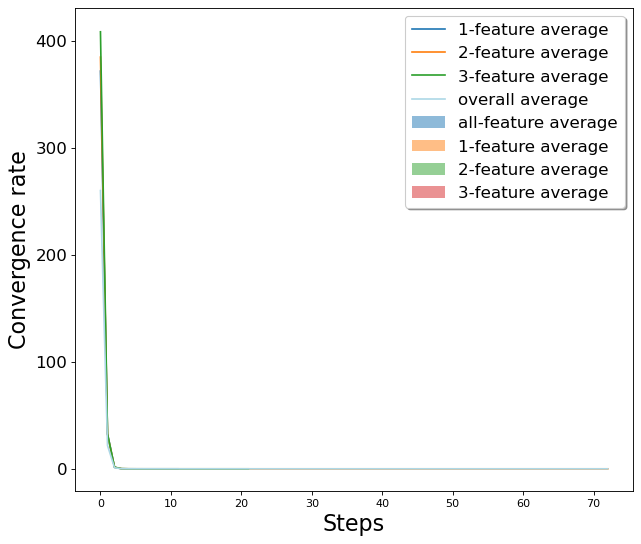

In [115]:
X1 = shift + np.arange(len(mean_1_dim))
X2 = shift + np.arange(len(mean_2_dim))
X3 = shift + np.arange(len(mean_3_dim))
X_overal = shift + np.arange(length)
fig = plt.figure(figsize=(9, 8), dpi=80)
plt.plot(X1, mean_1_dim, label = '1-feature average')
plt.plot(X2, mean_2_dim, label = '2-feature average')
plt.plot(X3, mean_3_dim, label = '3-feature average')
plt.plot(X_overal, mean_overal, label = 'overall average', color = 'lightblue')
plt.fill_between(X_overal, mean_overal - std_overal, mean_overal + std_overal, alpha=0.5, label = 'all-feature average')
plt.fill_between(X1, mean_1_dim - std_1_dim, mean_1_dim + std_1_dim, alpha=0.5, label = '1-feature average')
plt.fill_between(X2, mean_2_dim - std_2_dim, mean_2_dim + std_2_dim, alpha=0.5, label = '2-feature average')
plt.fill_between(X3, mean_3_dim - std_3_dim, mean_3_dim + std_3_dim, alpha=0.5, label = '3-feature average')
plt.xlabel("Steps", fontsize=20)
plt.yticks(fontsize = 15)
plt.ylabel("Convergence rate", fontsize=20)
plt.legend(loc='upper right', shadow=True, fontsize=15)
plt.savefig(fname = f"cvg_3D", bbox_inches='tight')

In [119]:
def get_tuple(arr):
    new_arr = []
    for i, num in enumerate(arr):
        if 5 <= 1 <= 11:
        # if 5 <=i <= 15 or (35 >= i>=15 and i % 5 == 0): 
            print(i)
            new_arr.append((i, float(num)))
    return new_arr


def get_tuple(mean, std):
    new_arr_upper = []
    new_arr_lower = []
    for i, num in enumerate(mean):
        if 5 <= i <= 11:
            new_arr_upper.append((i, float(num + std[i])))
            new_arr_lower.append((i, float(num - std[i])))
    return new_arr_upper, new_arr_lower
# mean_1_d = get_tuple(mean_1_dim)
# mean_2_d = get_tuple(mean_2_dim)
# mean_3_d = get_tuple(mean_3_dim)
# mean_ovr = get_tuple(mean_overal)
# print("Convergence-2-dim:",  np.array(mean_2_dim))
# print("Convergence-3-dim:",  np.array(mean_3_dim))
# print("Convergence-average:",  np.array(mean_overal))

In [120]:
print(get_tuple(mean_1_dim, std_1_dim))
# print(get_tuple(mean_3_dim))

([(5, 0.00025513104628771544), (6, 1.4920925423211884e-05), (7, 8.744783031033876e-07), (8, 5.128519475761095e-08), (9, 3.0072102585876337e-09), (10, 1.775136149184675e-10), (11, 1.0480306726623478e-11)], [(5, 0.0002314930607099086), (6, 1.3539532119466458e-05), (7, 7.939467536743905e-07), (8, 4.659181840338533e-08), (9, 2.734196646869691e-09), (10, 1.6036411087938518e-10), (11, 9.555265433058846e-12)])


In [681]:
print(mean_ovr)

[(5, 0.001366131822578609), (10, 2.9878663099225378e-06), (15, 1.3734143600174775e-08), (20, 7.569454091305161e-11), (25, 4.863150593337195e-07), (30, 1.5331025338127802e-07), (35, 4.840697442887176e-08), (40, 1.5285932519759626e-08), (45, 4.828894617503465e-09), (50, 1.5245110729367184e-09), (55, 4.812847342883231e-10), (60, 1.5203852066214552e-10), (65, 4.798466138322688e-11), (70, 1.5207980708087376e-11)]


In [649]:
for i, num in enumerate(mean_ovr):
    if i % 2 != 0:
        del mean_ovr[i]
print(mean_ovr)

[(0, 259.9550476074219), (3, 0.06554341316223145), (5, 0.001366131822578609), (8, 2.9499402444344014e-05), (9, 9.248193236999214e-06), (11, 9.88496594800381e-07), (13, 1.1393520793490097e-07), (16, 4.817072518648047e-09), (17, 1.6976526850953633e-09), (20, 7.569454091305161e-11), (21, 2.6989152232537172e-11), (24, 6.129268399490684e-07), (25, 4.863150593337195e-07), (28, 2.432021233289561e-07), (30, 1.5331025338127802e-07), (32, 9.666518963058479e-08), (33, 7.675980384647119e-08), (36, 3.843838314310233e-08), (38, 2.4241716189976614e-08), (40, 1.5285932519759626e-08), (41, 1.2141001981547106e-08), (44, 6.079726500018978e-09), (46, 3.833400707975443e-09), (49, 1.9198254097574363e-09), (50, 1.5245110729367184e-09), (52, 9.610460205422555e-10), (54, 6.066020463713073e-10), (57, 3.0377445003892944e-10), (58, 2.4079602201076966e-10), (61, 1.2080970945849145e-10), (62, 9.581229559740834e-11), (65, 4.798466138322688e-11), (66, 3.8229856780258586e-11), (69, 1.9034804982220876e-11), (71, 1.2037

In [131]:
MAE_1_dim = {'o': 0.006633792957291007, 'a': 0.016474167257547377, 'g': 0.024718802236020566}
RMSE_1_dim = {'o': 0.15092755109071732 , 'a': 0.23293347358703614, 'g': 0.2893358588218689}
MAE_std_1_dim = {'o':6.025893822890642e-05, 'a': 3.229806839611141e-05, 'g': 0.0006982582461078454}
RMSE_std_1_dim = {'o': 0.001388827890586476, 'a': 0.00046175644723936806, 'g': 0.0006982582461078454}

             
             
MAE_2_dim = {'ao': 0.010069710575044155, 'go': 0.011564504075795411, 'ag': 0.0280405942350626}
RMSE_2_dim = {'ao': 0.18349728882312774, 'go': 0.1952381193637848, 'ag': 0.3059135854244232}
MAE_std_2_dim = {'ao': 2.488768199040892e-05, 'go': 3.221840949480004e-05, 'ag': 5.395768567744791e-05}
RMSE_std_2_dim = {'ao': 0.00039635153247921065, 'go': 0.0005198510184121028, 'ag': 0.0005859801346510089}
             
MAE_3_dim = [0.015438266098499298]
MAE_std_3_dim = [1.1866290855620502e-05]
RMSE_3_dim = [0.13534521460533142 ] 
RMSE_std_3_dim = [7.951946338135181e-05]

In [132]:
mean_1_dim = np.mean(list(RMSE_1_dim.values()))
mean_2_dim = np.mean(list(RMSE_2_dim.values()))

In [133]:
mean_1_dim

0.2243989611665408

In [134]:
mean_2_dim

0.2282163312037786

In [105]:
def get_2dim(arr):
    new_arr = []
    for key, value in arr.items():
        if key == 'ao':
            new_arr.append(('age-occup',value))
        if key == 'go':
            new_arr.append(('gender-occup',value))
        if key == 'ag':
            new_arr.append(('age-gender',value))
    return new_arr

def get_1dim(arr):
    new_arr = []
    for key, value in arr.items():
        if key == 'a':
            new_arr.append(('age',value))
        if key == 'g':
            new_arr.append(('gender',value))
        if key == 'o':
            new_arr.append(('occup',value))
    return new_arr


def get_std_dim(arr):
    new_arr = []
    for key, value in arr.items():
        if key == 'a':
            new_arr.append(('age',value))
        if key == 'g':
            new_arr.append(('gender',value))
        if key == 'o':
            new_arr.append(('occup',value))
    return new_arr

In [106]:
RMSE_std_1d = get_1dim(RMSE_std_1_dim)

In [107]:
RMSE_std_1d

[('occup', 0.001388827890586476),
 ('age', 0.00046175644723936806),
 ('gender', 0.0006982582461078454)]

<AxesSubplot:title={'center':'RMSE'}, xlabel='Features'>

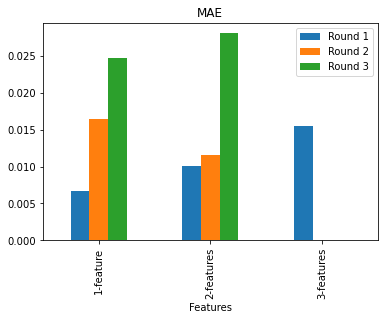

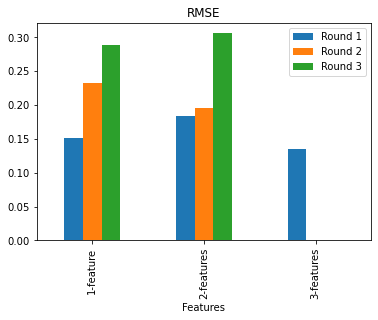

In [682]:
X = np.arange(3)
labels = ["1-feature", "2-features", "3-features"]
first_col = ['1-feature'] + list(MAE_1_dim.values())
sec_col = ['2-features'] + list(MAE_2_dim.values())
third_col = ['3-features'] + list(MAE_3_dim)
data_MAE = [first_col, sec_col, third_col]

first_col = ['1-feature'] + list(RMSE_1_dim.values())
sec_col = ['2-features'] + list(RMSE_2_dim.values())
third_col = ['3-features'] + list(RMSE_3_dim)
data_RMSE = [first_col, sec_col, third_col]


# create data
df = pd.DataFrame(data_MAE,
                  columns=['Features', 'Round 1', 'Round 2', 'Round 3'])
# view data
df1 = pd.DataFrame(data_RMSE,
                  columns=['Features', 'Round 1', 'Round 2', 'Round 3'])
  
# plot grouped bar chart
df.plot(x='Features',
        kind='bar',
        stacked=False,
        title='MAE')

df1.plot(x='Features',
        kind='bar',
        stacked=False,
        title='RMSE')

In [683]:
data_MAE

[['1-feature',
  0.006633792957291007,
  0.016474167257547377,
  0.024718802236020566],
 ['2-features',
  0.010069710575044155,
  0.011564504075795411,
  0.0280405942350626],
 ['3-features', 0.015438266098499298]]

In [ ]:
# plt.plot(X, mean_age, label = 'age')
# plt.plot(X, mean_occup, label = 'occupation')
# plt.plot(X, mean_gender, label = 'gender')
# plt.fill_between(X, mean_age - std_age, mean_age + std_age, alpha=0.5, label = 'age')
# plt.fill_between(X, mean_occup - std_occup, mean_occup + std_occup, alpha=0.5, label = 'occupation')
# plt.fill_between(X, mean_gender - std_gender, mean_gender + std_gender, alpha=0.5, label = 'gender')